In [1]:
!pip install pymysql

In [1]:
import pymysql

In [2]:
MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

In [3]:
# 최초 한 번만 구동시키면 된다.
# 본인 계정을 숨길 생각이라면 한 번 사용 이후에 id, password를 지우도록 한다.
import pickle

mysql_user_info = dict({
    'user_id': 'khweb',
    'password': 'khWeb@123'
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close()

del mysql_user_info

In [4]:
import pickle

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

#print(mysql_user_info)

In [5]:
# DB 연결
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트 번호
    port = 3306,
    # 아뒤
    user = mysql_user_info['user_id'],
    # 비번
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'
)

print(db)

In [6]:
# 이제 DB에서 select 등을 수행했을때
# 나오는 결과를 순회할 수 있도록 지원하는 객체를 가져온다.
cursor = db.cursor()

print(cursor)

In [7]:
# MySQL 수동 쿼리를 적용하여 table을 생성해보도록 한다.
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
db.commit()

# 작업 완료 이후 DB 연결을 끊는다.
db.close()

print("테이블 생성 성공!")

테이블 생성 성공!


In [8]:
# insert 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 34000000))
cursor.execute(sql, ('GPU Server', 20000000))
cursor.execute(sql, ('RTX 3090', 4000000))

db.commit()

db.close()

print("테이블에 값 넣기 성공!")

테이블에 값 넣기 성공!


In [9]:
# select(값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()
print(rows)

db.close()

print("데이터 불러오기 성공!")

((1, 'Xeon Server', 10000000), (2, 'FPGA Server', 34000000), (3, 'GPU Server', 20000000), (4, 'RTX 3090', 4000000))
데이터 불러오기 성공!


In [10]:
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print(row)

db.close()

print("데이터 낱개로 불러오기 성공!")

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 34000000)
(3, 'GPU Server', 20000000)
(4, 'RTX 3090', 4000000)
데이터 낱개로 불러오기 성공!


In [19]:
# 낱개 내에서 각각의 데이터를 얻기(딕셔너리 형식이라 키값으로 뽑으면 됨)
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print('id: ', row['id'], ', name: ', row['name'], ', price: ', row['price'])

db.close()

print("데이터 낱개로 불러와 특정값 추출하기 성공!")

id:  1 , name:  Xeon Server , price:  10000000
id:  2 , name:  FPGA Server , price:  34000000
id:  3 , name:  GPU Server , price:  20000000
id:  4 , name:  RTX 3090 , price:  4000000
데이터 낱개로 불러와 특정값 추출하기 성공!


In [20]:
# 입력한 데이터값 정리하기(테이블 삭제)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()
db.close()

print("테이블 삭제 성공!")

테이블 삭제 성공!


In [22]:
# 소수점 데이터 처리하기!
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()
db.close()

print("float 형식의 테이블 생성 성공!")

float 형식의 테이블 생성 성공!


In [23]:
import time
import math
import calendar
import datetime
import numpy as np

In [24]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [40]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [41]:
# 가우시안 분포(정규 분포) 형식을 따르는 랜덤을 만듬
# 용어 필요 없고 데이터 개수에 따른 랜덤을 적절하게 만들어줌(자연스럽게)
noise = np.random.normal(size = len(sample_time))

print(noise)

[ 0.65751051  0.24256593 -0.86811157 ... -0.01037005  1.43021615
  0.10342005]


In [42]:
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[3.65751051 3.24252843 2.13173844 ... 2.87239594 4.31709838 2.99434635]
[ 3.25558672  2.84513045  1.73891783 ... -1.11680156  0.33215515
 -0.98626056]


In [43]:
!pip install matplotlib

In [44]:
import matplotlib.pyplot as plt

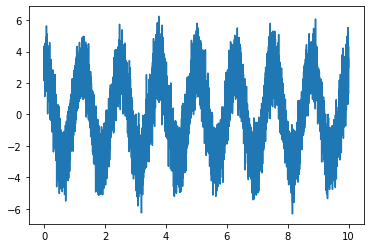

In [45]:
plt.plot(sample_time, voltage)
plt.show()

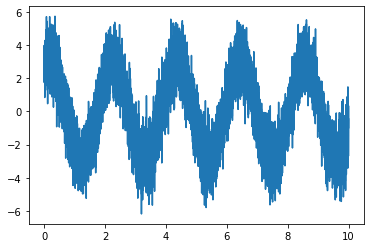

In [46]:
plt.plot(sample_time, current)
plt.show()

In [47]:
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개짜리 배열이므로
# 곱셈을 수행할 경우 알아서 1000개 배열에 1000씩 곱해짐(자동으로)
ts = (sample_time * 1000) + ts

print(ts)

1633942528
[1.63394253e+09 1.63394253e+09 1.63394253e+09 ... 1.63395252e+09
 1.63395253e+09 1.63395253e+09]


In [48]:
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

In [49]:
curr_time = []

for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2021-10-11 17:55:28', '2021-10-11 17:55:29', '2021-10-11 17:55:30', '2021-10-11 17:55:31', '2021-10-11 17:55:32', '2021-10-11 17:55:33', '2021-10-11 17:55:34', '2021-10-11 17:55:35', '2021-10-11 17:55:36', '2021-10-11 17:55:37', '2021-10-11 17:55:38', '2021-10-11 17:55:39', '2021-10-11 17:55:40', '2021-10-11 17:55:41', '2021-10-11 17:55:42', '2021-10-11 17:55:43', '2021-10-11 17:55:44', '2021-10-11 17:55:45', '2021-10-11 17:55:46', '2021-10-11 17:55:47', '2021-10-11 17:55:48', '2021-10-11 17:55:49', '2021-10-11 17:55:50', '2021-10-11 17:55:51', '2021-10-11 17:55:52', '2021-10-11 17:55:53', '2021-10-11 17:55:54', '2021-10-11 17:55:55', '2021-10-11 17:55:56', '2021-10-11 17:55:57', '2021-10-11 17:55:58', '2021-10-11 17:55:59', '2021-10-11 17:56:00', '2021-10-11 17:56:01', '2021-10-11 17:56:02', '2021-10-11 17:56:03', '2021-10-11 17:56:04', '2021-10-11 17:56:05', '2021-10-11 17:56:06', '2021-10-11 17:56:07', '2021-10-11 17:56:08', '2021-10-11 17:56:09', '2021-10-11 17:56:10', '2021-10-1

In [50]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

# 소수점 형식의 데이터와 현재 시간값을 기록하도록 한다.
sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values(
        %s, %s, %s, %s, %s
    )
"""

try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'EDDI',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
            
        db.commit()
finally:
    db.close()
    
print('소수점 형식 데이터 및 날자 형식 데이터 입력 완료!')

소수점 형식 데이터 및 날자 형식 데이터 입력 완료!
